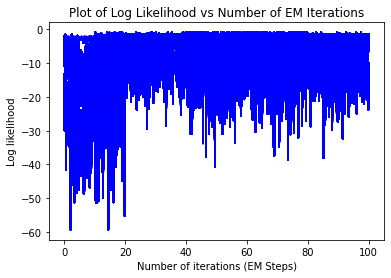

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
np.random.seed(0)


# Generate data
mean1, sigma1, pi1  = -4, np.sqrt(1.2), 0.1 ## Mean and stdev (as sqrt of variance)
mean2, sigma2, pi2= 4, np.sqrt(1.8), 0.1
mean3, sigma3, pi3 = 0, np.sqrt(1.6), 0.2
mean4, sigma4, pi4 = 2, np.sqrt(1.8), 0.4
mean5, sigma5, pi5 = -1, np.sqrt(2), 0.2
n_samples = 1000

true_mean = [mean1, mean2, mean3, mean4, mean5]
true_sigma = [sigma1, sigma2, sigma3, sigma4, sigma5]
true_pi = [pi1, pi2, pi3, pi4, pi5]

true_theta = np.array([true_mean, true_sigma, true_pi])


x1 = np.random.normal(mean1, sigma1, int(n_samples*pi1))
x2 = np.random.normal(mean2, sigma2, int(n_samples*pi2))
x3 = np.random.normal(mean3, sigma3, int(n_samples*pi3))
x4 = np.random.normal(mean4, sigma4, int(n_samples*pi4))
x5 = np.random.normal(mean5, sigma5, int(n_samples*pi5))
X = np.atleast_2d(list(x1) +list(x2) + list(x3)+list(x4)+list(x5))


#Construct initial theta Ansatz (guess)
mean_ansatz = [20, -10, -5, 13, 20]
sigma_ansatz = [7, 2.4, 5.9, 2.1, 8]
pi_ansatz = [0.4, 0.2, 0.1, 0.25, 0.05]

theta_ansatz = np.array([mean_ansatz, sigma_ansatz, pi_ansatz])



counter_vals = []
# Part(b) Computing the membership probabilities
counter = 0



norm1 = true_pi[0]/sigma1*(np.exp(-((X-mean1)**2/2*sigma1**2)))
norm2 = true_pi[1]/sigma2*(np.exp(-((X-mean2)**2/2*sigma2**2)))
norm3 = true_pi[2]/sigma3*(np.exp(-((X-mean3)**2/2*sigma3**2)))
norm4 = true_pi[3]/sigma4*(np.exp(-((X-mean4)**2/2*sigma4**2)))
norm5 = true_pi[4]/sigma5*(np.exp(-((X-mean5)**2/2*sigma5**2)))                                                                        

# Summation in the denominator        
denom_sum = (norm1)+(norm2)+norm3+norm4+norm5

while(counter < 100):

    n_by_k = np.zeros((1000, 5)).T


    for i in range(len(true_mean)):
        n_by_k[i] = (true_pi[i]/true_sigma[i]*np.exp(-(X-true_mean[i])**2/2*true_sigma[i]**2))/denom_sum


    n_by_k = n_by_k.T # Obtain a 1000 by 5 matrix as required
  
    # Update model parameters
    N_k = n_by_k.sum(axis=0)
    new_wnk = N_k/1000
    pi_ansatz = new_wnk
    # Update means
    new_means = ((n_by_k.T @ X.T).T)/N_k
    mean_ansatz = new_means

    #Update sigma
    #y-new_mean matrix
    for k in range(len(new_means)):
        x_minus_new_mean = ((X.T-new_means[k])**2)

    new_sigma = (1/N_k*(n_by_k*(x_minus_new_mean)))
    new_sigma = (np.sqrt(sum(new_sigma)))
    sigma_ansatz = new_sigma
    
    arg = (-(X.T-new_means)**2)/(2*new_sigma**2)
    log_ll = np.log(new_wnk/new_sigma*(np.exp(arg)))

    
    x = np.linspace(0, 100, 1000)
    plt.plot(x,log_ll, c='b')
    plt.xlabel('Number of iterations (EM Steps)')
    plt.ylabel('Log likelihood')
    plt.title('Plot of Log Likelihood vs Number of EM Iterations')
    
    
    counter += 1